# Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

## Import libraries and resources

In [44]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
dataset = pd.read_csv('student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploratory Data Analysis (EDA)

In [46]:
# 1. Data Overview
print(dataset.info())  # Check data types and missing values
print(dataset.describe())  # Summary statistics for numerical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


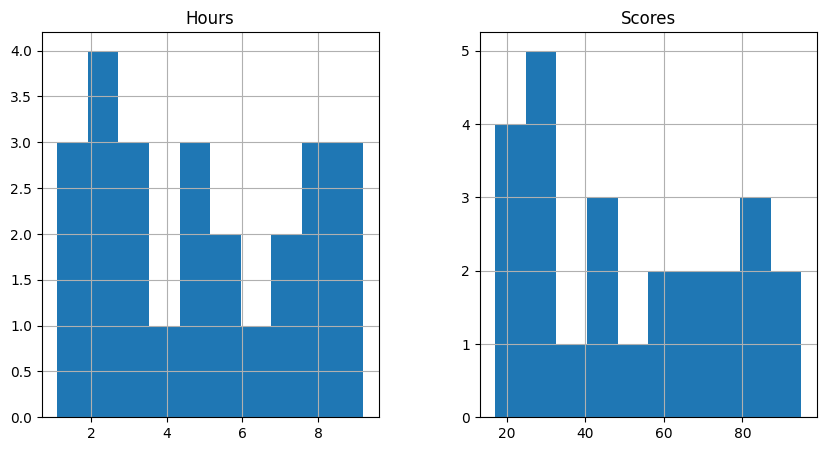

In [47]:
# 2. Data Visualization
# Histogram for 'Hours' and 'Scores'
dataset.hist(['Hours', 'Scores'], bins=10, figsize=(10, 5))
plt.show()

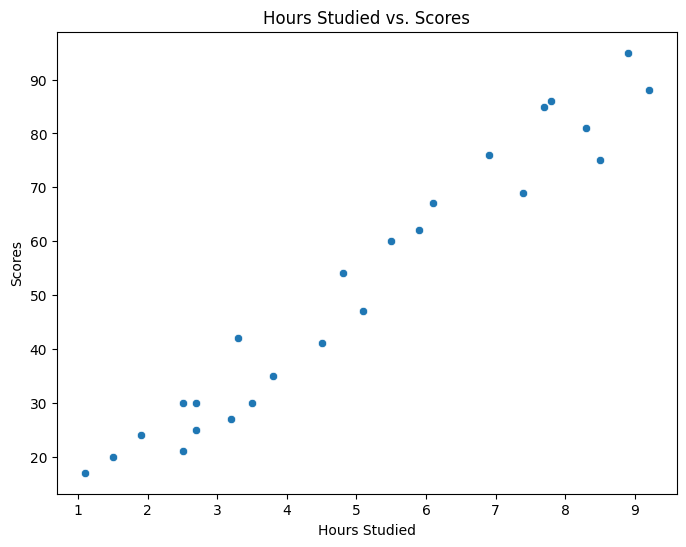

In [48]:
# Scatter plot for 'Hours' vs 'Scores'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours', y='Scores', data=dataset)
plt.title('Hours Studied vs. Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

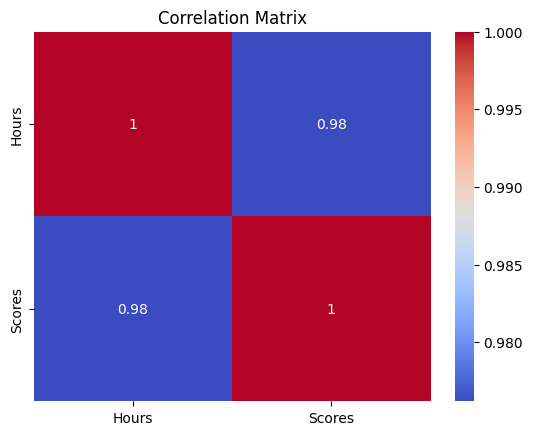

In [49]:
# Correlation matrix
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [50]:
# 1. Check Duplicated Data
print(f"Number of duplicated rows: {dataset.duplicated().sum()}")
if dataset.duplicated().any():
    dataset = dataset.drop_duplicates()

Number of duplicated rows: 0


In [51]:
# 2. Check Missing Value Handling
print(dataset.isnull().sum())  # Check for missing values

Hours     0
Scores    0
dtype: int64


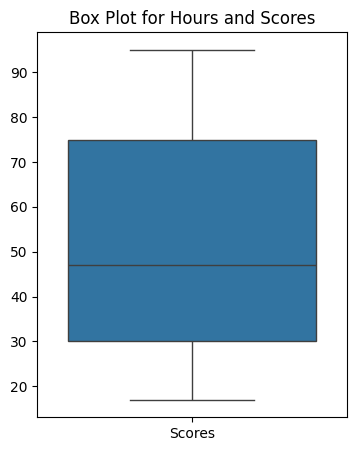

In [52]:
# 3. Outlier Analysis
# Box plot for 'Hours' and 'Scores'
plt.figure(figsize=(4, 5))
sns.boxplot(data=dataset[['Scores']])
plt.title('Box Plot for Hours and Scores')
plt.show()

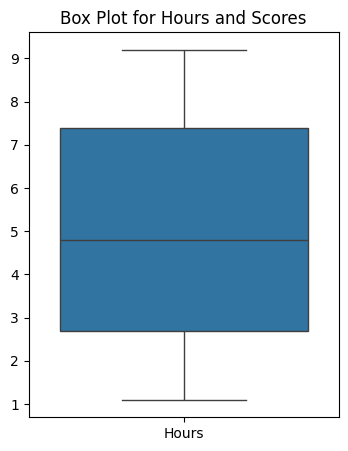

In [53]:
# 3. Outlier Analysis
# Box plot for 'Hours' and 'Scores'
plt.figure(figsize=(4, 5))
sns.boxplot(data=dataset[['Hours']])
plt.title('Box Plot for Hours and Scores')
plt.show()

## Machine Learning Regression

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
# Split data into training and testing sets
X = dataset[['Hours']]
y = dataset['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train and evaluate multiple models

In [58]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("----------------------")

Model: Linear Regression
Mean Squared Error: 18.943211722315272
R-squared: 0.9678055545167994
----------------------
Model: Decision Tree Regressor
Mean Squared Error: 31.7
R-squared: 0.9461250849762066
----------------------
Model: Random Forest Regressor
Mean Squared Error: 12.830860277777768
R-squared: 0.9781936433076517
----------------------


## Model Evaluation and Visualization

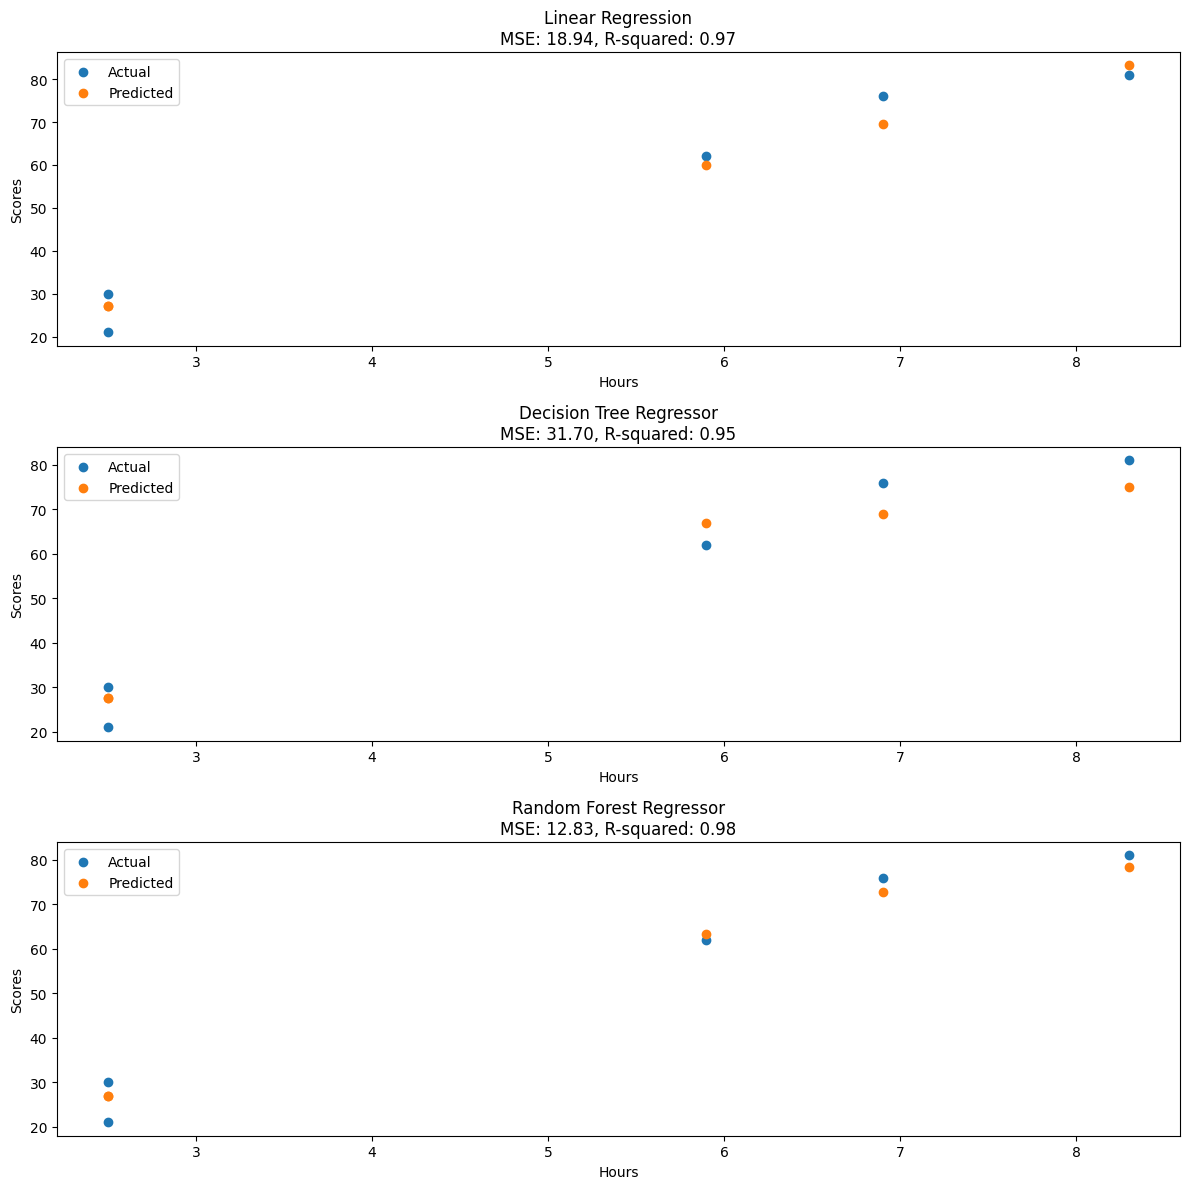

In [59]:
plt.figure(figsize=(12, 12))

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    plt.subplot(3, 1, i + 1)
    plt.scatter(X_test, y_test, label='Actual')
    plt.scatter(X_test, y_pred, label='Predicted')
    plt.title(f'{name}\nMSE: {mse:.2f}, R-squared: {r2:.2f}')
    plt.xlabel('Hours')
    plt.ylabel('Scores')
    plt.legend()

plt.tight_layout()
plt.show()


## Conclusion




1.   Linear Regression:
  *  This model demonstrates reasonably high accuracy with an R-squared value close to 1, indicating that it can predict with a high level of precision.

2.   Decision Tree Regressor:
  * The accuracy of this model is slightly lower than that of Linear Regression. Decision Trees tend to capture specific patterns in the data, which can sometimes lead to overfitting, especially with small datasets.
3.   Random Forest Regressor:
  * This model has the lowest MSE and the highest R-squared value, indicating that Random Forest can better capture patterns and provide more accurate predictions compared to the other two models.

Overall Conclusion:

*   Random Forest Regressor is the best model among the three, with the lowest MSE and the highest R-squared, suggesting it is the most accurate in predicting scores based on study hours.
*   Linear Regression also performs well and provides reasonable accuracy, although it is slightly less optimal compared to Random Forest.
*   Decision Tree Regressor has lower accuracy compared to the other two models, likely due to overfitting.



